
Training and evaluating models for nox...
Linear Regression MSE for nox: 0.10803778337767452
Linear Regression RMSE for nox: 0.32869101505467796
Linear Regression MAE for nox: 0.1604896128013359
Linear Regression R² for nox: 0.8940306000462568


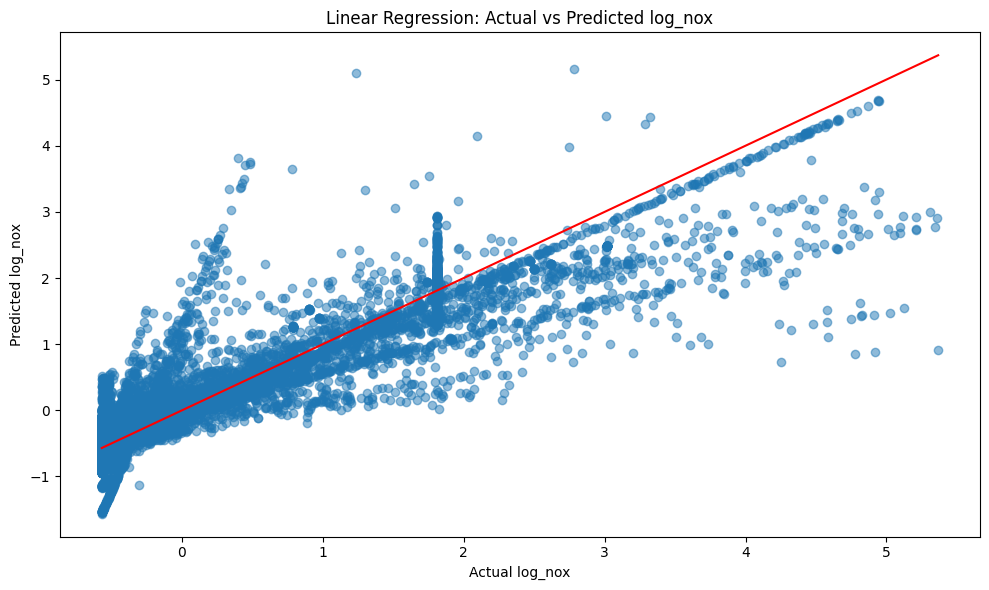

Random Forest MSE for nox: 0.00865904279419288
Random Forest RMSE for nox: 0.0930539778526038
Random Forest MAE for nox: 0.017217634002050994
Random Forest R² for nox: 0.9915067345850043


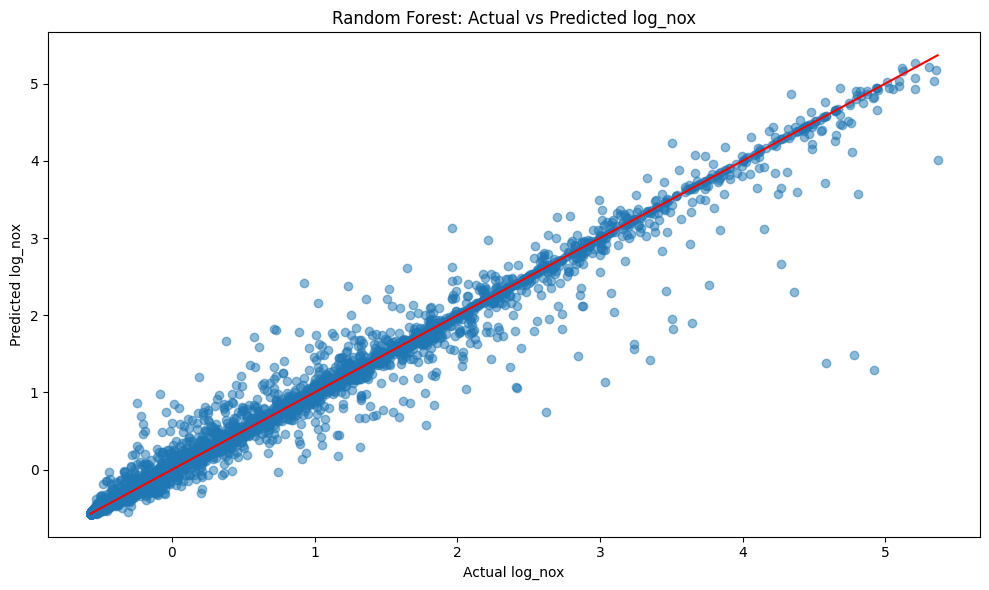

Gradient Boosting MSE for nox: 0.04023230185534954
Gradient Boosting RMSE for nox: 0.20057991388807989
Gradient Boosting MAE for nox: 0.09019030188026188
Gradient Boosting R² for nox: 0.9605379455864487


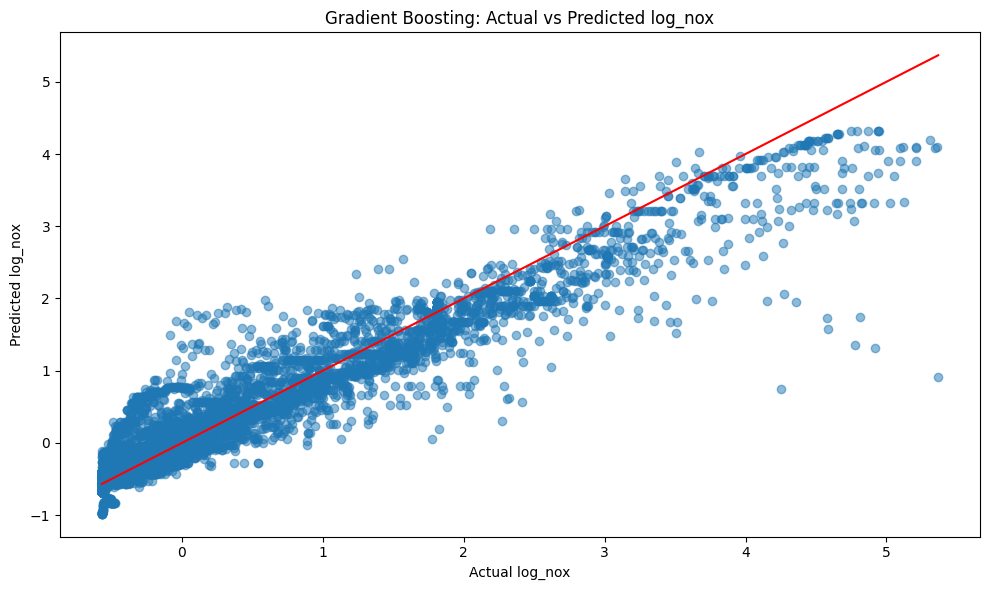


Training and evaluating models for pm10...
Linear Regression MSE for pm10: 0.10177817790089784
Linear Regression RMSE for pm10: 0.3190269234733925
Linear Regression MAE for pm10: 0.15646112756360234
Linear Regression R² for pm10: 0.8983819025138651


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the cleaned data
file_path = 'Emissions_by_Grid_ID_2019_cleaned.csv'
df_cleaned = pd.read_csv(file_path)

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)

# Convert scaled features back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df_encoded.columns)

# Define a function to train and evaluate models for each emission content
def train_and_evaluate_models(target_column):
    print(f"\nTraining and evaluating models for {target_column}...")

    # Split the data into training and testing sets
    X = df_scaled.drop(columns=[target_column])  # Features
    y = df_scaled[target_column]  # Target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_test)
    print(f"Linear Regression MSE for {target_column}:", mean_squared_error(y_test, lr_predictions))
    print(f"Linear Regression RMSE for {target_column}:", np.sqrt(mean_squared_error(y_test, lr_predictions)))
    print(f"Linear Regression MAE for {target_column}:", mean_absolute_error(y_test, lr_predictions))
    print(f"Linear Regression R² for {target_column}:", r2_score(y_test, lr_predictions))

    # Plot predicted vs actual log_nox values for Linear Regression
    if target_column == 'nox':
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, lr_predictions, alpha=0.5)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
        plt.xlabel('Actual log_nox')
        plt.ylabel('Predicted log_nox')
        plt.title(f'Linear Regression: Actual vs Predicted log_{target_column}')
        plt.tight_layout()
        plt.savefig(f'linear_regression_predicted_vs_actual_log_{target_column}.png')
        plt.show()
        
    # Random Forest
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)
    print(f"Random Forest MSE for {target_column}:", mean_squared_error(y_test, rf_predictions))
    print(f"Random Forest RMSE for {target_column}:", np.sqrt(mean_squared_error(y_test, rf_predictions)))
    print(f"Random Forest MAE for {target_column}:", mean_absolute_error(y_test, rf_predictions))
    print(f"Random Forest R² for {target_column}:", r2_score(y_test, rf_predictions))

    # Plot predicted vs actual log_nox values for Random Forest
    if target_column == 'nox':
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, rf_predictions, alpha=0.5)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
        plt.xlabel('Actual log_nox')
        plt.ylabel('Predicted log_nox')
        plt.title(f'Random Forest: Actual vs Predicted log_{target_column}')
        plt.tight_layout()
        plt.savefig(f'random_forest_predicted_vs_actual_log_{target_column}.png')
        plt.show()
        
    # Gradient Boosting
    gb_model = GradientBoostingRegressor(random_state=42)
    gb_model.fit(X_train, y_train)
    gb_predictions = gb_model.predict(X_test)
    print(f"Gradient Boosting MSE for {target_column}:", mean_squared_error(y_test, gb_predictions))
    print(f"Gradient Boosting RMSE for {target_column}:", np.sqrt(mean_squared_error(y_test, gb_predictions)))
    print(f"Gradient Boosting MAE for {target_column}:", mean_absolute_error(y_test, gb_predictions))
    print(f"Gradient Boosting R² for {target_column}:", r2_score(y_test, gb_predictions))

  # Plot predicted vs actual log_nox values for Gradient Boosting
    if target_column == 'nox':
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, gb_predictions, alpha=0.5)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
        plt.xlabel('Actual log_nox')
        plt.ylabel('Predicted log_nox')
        plt.title(f'Gradient Boosting: Actual vs Predicted log_{target_column}')
        plt.tight_layout()
        plt.savefig(f'gradient_boosting_predicted_vs_actual_log_{target_column}.png')
        plt.show()

        
# Train and evaluate models for each emission content
emission_columns = ['nox', 'pm10', 'pm2.5', 'co2']
for col in emission_columns:
    train_and_evaluate_models(col)
